In [2]:
import yaml
import numpy as np
import zstandard as zstd
import os
from TraceSimulator import TraceSimulator
from trace_IO import *
import matplotlib.pyplot as plt
import DELightStyle
plt.rcParams['font.family'] = 'DejaVu Sans'  # Matplotlib's default font

def read_yaml_to_dict(file_path):
    with open(file_path, 'r') as file:
        config_dict = yaml.safe_load(file)
    return config_dict

config = read_yaml_to_dict('./config.yaml')
ts = TraceSimulator(config)

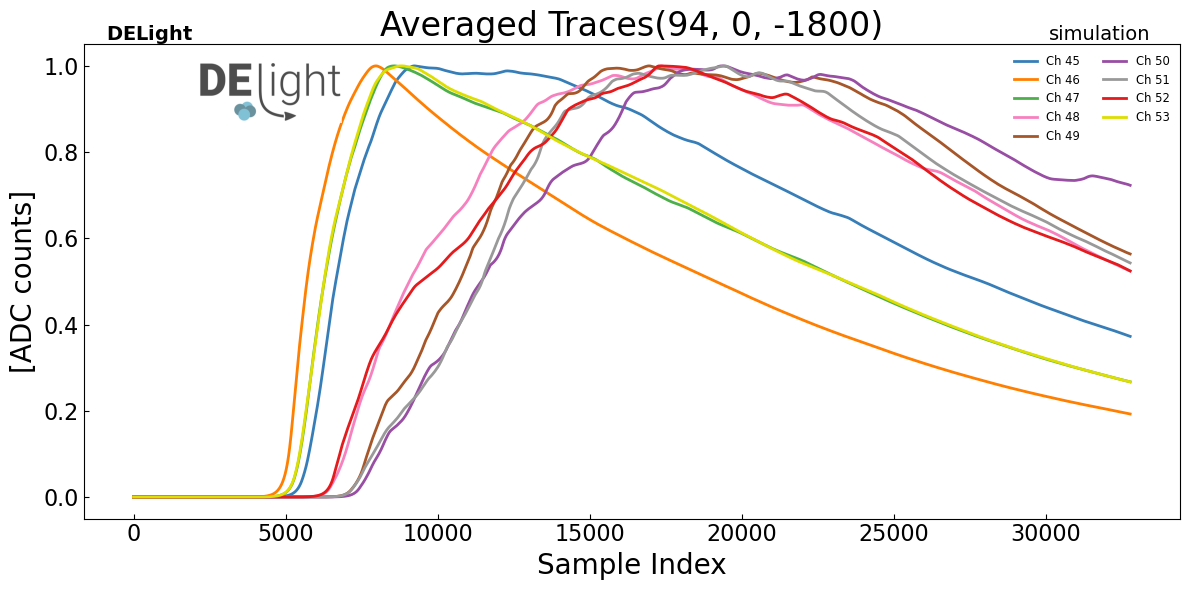

In [14]:
num_sets = 1
start_channel = 45
x_val = 94
y_val = 0
z_val = -1800

# Generate the first trace to determine shapes
trace = ts.generate(E=0,x = x_val, y=y_val, z=z_val, no_noise=True, type_recoil='NR', quantize=False, phonon_only=True)
num_channels, num_samples = trace[0].shape

# Preallocate array to hold traces for selected channels
trace_accumulator = np.zeros((num_channels - start_channel, num_samples))

# Accumulate traces
for _ in range(num_sets):
    trace  = ts.generate(E=100000,x = x_val, y=y_val, z=z_val, no_noise=True, type_recoil='NR', quantize=False, phonon_only=True)
    trace_accumulator += trace[0][start_channel:]

# Average over all sets
avg_traces = trace_accumulator / num_sets

# Normalize each channel to its maximum

normalized_traces = avg_traces / np.max(np.abs(avg_traces), axis=1, keepdims=True)

# Plot the normalized average traces
fig, ax = plt.subplots(figsize=(12, 6))  # Get both fig and ax objects
for i, ch in enumerate(normalized_traces):
    ax.plot(ch, label=f'Ch {start_channel + i}')

ax.set_title(f"Averaged Traces({x_val}, {y_val}, {z_val})")
ax.set_xlabel("Sample Index")
ax.set_ylabel("[ADC counts]")
ax.legend(loc='upper right', fontsize='small', ncol=2)

# Apply DELightStyle elements with correct ax reference
DELightStyle.display_text(ax, r'$\mathbf{DELight}$', x0=0.02, y0=1.045)
DELightStyle.display_delight_logo(ax, x0=0.02, y0=0.98)
DELightStyle.display_text(ax, "simulation", x0=0.88, y0=1.04)

plt.tight_layout()
plt.show()

In [8]:
avg_8 = np.mean(avg_traces[1:], axis=0)

# Renormalize: divide by max absolute value to scale to [-1, 1]
avg_8_normalized = avg_8 / np.max(np.abs(avg_8))

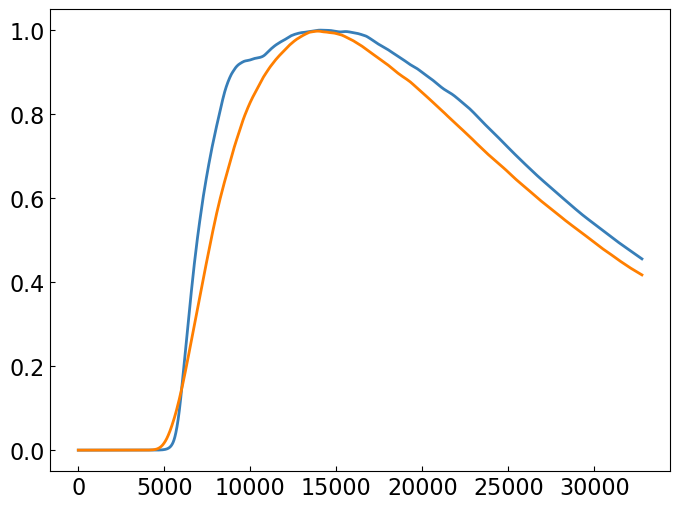

In [12]:
plt.plot(avg_8_normalized)
plt.plot(ch46)

In [10]:
ch46 = np.load("templates/vac_ch46plus_low_eng.npy")

In [15]:
np.save("vac_ch_template_1.npy", ch46)